# Exercise 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import subprocess
import pandas as pd

In [118]:
#generate bins
data = np.loadtxt("eigenvalues_spacing.txt")
hist, bin_edges =np.histogram(data, density = 1, bins  =30)
bin_centres = (bin_edges[1:]+bin_edges[:-1])/2
graph_ = pd.DataFrame([bin_centres, hist]).T
graph_.to_csv(str("hist_standard.txt"), header=None, index=None, sep="\t")

In [119]:
#implemented the gnuplot FIT in ptyhon with the different methods with cubic fit.
in_files = ["hist_standard.txt"]
out_files = ["hist_standard.pdf"]
for i in range(1):
    fl = open("fit_file.txt", "w+")
    fl.write(in_files[i])
    fl.close()
    
    fn = open("out_file.txt", "w+")
    fn.write(out_files[i])
    fn.close()
    subprocess.call(["gnuplot","Ex5_fit.gp"])

### Local spacing

In [81]:
n = 2500
intervals = [n/200, n/100, n/50, n/25, n/10, n/5, n/2]

interv_str = []
for i in range(len(intervals)):
    inter = "%04d" % intervals[i]
    interv_str.append(inter)
    
interv_str

['0012', '0025', '0050', '0100', '0250', '0500', '1250']

In [75]:
in_files = []
out_files  =[]
for i in interv_str:
    data = np.loadtxt("local_spacing_"+str(i)+".txt")
    hist, bin_edges =np.histogram(data, density = 1, bins  =200)
    bin_centres = (bin_edges[1:]+bin_edges[:-1])/2
    graph_ = pd.DataFrame([bin_centres, hist]).T
    graph_.to_csv(str("hist_local"+str(i)+".txt"), header=None, index=None, sep="\t")
    in_files.append("hist_local"+str(i)+".txt")
    out_files.append("hist_local"+str(i)+".pdf")

In [76]:
#implemented the gnuplot FIT in ptyhon with the different methods with cubic fit.
for i in range(len(intervals)):
    fl = open("fit_file.txt", "w+")
    fl.write(in_files[i])
    fl.close()
    
    fn = open("out_file.txt", "w+")
    fn.write(out_files[i])
    fn.close()
    subprocess.call(["gnuplot","Ex5_fit.gp"])

Generating plots

In [3]:
param_files = []
for i in interv_str:
    param_files.append("paramhist_local"+str(i)+".txt")

param_files.append("paramhist_standard.txt")

In [4]:
interv_str.append(str(n))
interv_str

['0012', '0025', '0050', '0100', '0250', '0500', '1250', '2500']

In [5]:
a = []
b = []
beta = []
alpha = []
for i in range(len(param_files)):
    data = np.loadtxt(param_files[i])
    a.append(data[0][0])
    alpha.append(data[1][0])
    b.append(data[2][0])
    beta.append(data[3][0])


def distribution(x, a, alpha, b, beta):
    return a*(x**alpha)*np.exp(-b*(x**beta))

In [6]:
a

[3.35740073082372,
 3.35530047662223,
 3.36810042819539,
 3.44553859309805,
 3.59194433241422,
 3.89563086382039,
 5.10754473648372,
 14.0553340404903]

In [7]:
b

[1.31479514532526,
 1.31449916396975,
 1.31854748012557,
 1.34304030649198,
 1.38953962994789,
 1.47866488056657,
 1.77407313671586,
 2.8449055443227]

In [8]:
beta

[1.95590367100242,
 1.9566492536886,
 1.95507633864006,
 1.93706697294175,
 1.90415886679865,
 1.84496887627572,
 1.67360016750083,
 1.32010821103149]

In [9]:
alpha

[2.01460344907661,
 2.01013323860852,
 2.01107642354898,
 2.02274989744634,
 2.03950077548869,
 2.07763994026452,
 2.21254536830112,
 2.6001583494858]

In [19]:
def wigner(x):
    return 2*(4*x/np.pi)**2 *np.exp( -(4/np.pi)* x**2)

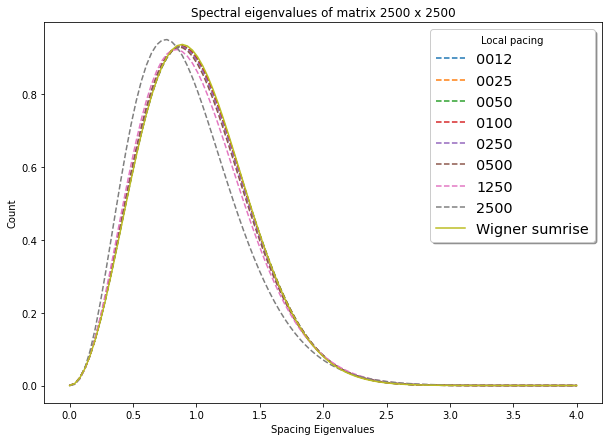

In [21]:
x = np.linspace(0,4, 100)
wig = wigner(x)
f, ax1 = plt.subplots(figsize=(10,7))

for i in range(len(param_files)):
    y = distribution(x, a[i], alpha[i], b[i], beta[i])
    ax1.plot(x, y, label =interv_str[i],linestyle='--')

ax1.plot(x, wig, label ='Wigner sumrise',linestyle='-')
ax1.set(xlabel='Spacing Eigenvalues', ylabel='Count',
       title='Spectral eigenvalues of matrix 2500 x 2500')
        
legend = ax1.legend(loc='upper right', shadow=True, fontsize='x-large', title='Local pacing')
plt.savefig('Fitted.png', dpi=300, bbox_inches='tight')
plt.show()

## Diagonal

In [166]:
#diagonal
data = np.loadtxt("eigen_space_diag.txt")
hist, bin_edges =np.histogram(data, density = 1, bins  =500)
bin_centres = (bin_edges[1:]+bin_edges[:-1])/2
graph_ = pd.DataFrame([bin_centres, hist]).T
#graph_.columns  = ['bins', 'frequ']
#graph_ = graph_.sort_values('frequ', ascending = False)
graph_.to_csv(str("hist_diag.txt"), header=None, index=None, sep="\t")

In [167]:
#implemented the gnuplot FIT in ptyhon with the different methods with cubic fit.
in_files = ["hist_diag.txt"]
out_files = ["hist_diag.pdf"]
for i in range(1):
    fl = open("fit_file.txt", "w+")
    fl.write(in_files[i])
    fl.close()
    
    fn = open("out_file.txt", "w+")
    fn.write(out_files[i])
    fn.close()
    subprocess.call(["gnuplot","Ex5_fit.gp"])

### Local spacing

In [184]:
n = 2500
intervals = [n/500, n/100, n/50, 200.0, n/10]

interv_str = []
for i in range(len(intervals)):
    inter = "%04d" % intervals[i]
    interv_str.append(inter)

interv_str

['0005', '0025', '0050', '0200', '0250']

In [160]:
in_files = []
out_files  =[]
for i in interv_str:
    data = np.loadtxt("Results/local_space_diag_"+str(i)+".txt")
    hist, bin_edges =np.histogram(data, density = 1, bins  =200)
    bin_centres = (bin_edges[1:]+bin_edges[:-1])/2
    graph_ = pd.DataFrame([bin_centres, hist]).T
    graph_.to_csv(str("hist_local_diag"+str(i)+".txt"), header=None, index=None, sep="\t")
    in_files.append("hist_local_diag"+str(i)+".txt")
    out_files.append("hist_local_diag"+str(i)+".pdf")

In [179]:
#implemented the gnuplot FIT in ptyhon with the different methods with cubic fit.
for i in range(len(intervals)):
    fl = open("fit_file.txt", "w+")
    fl.write(in_files[i])
    fl.close()
    
    fn = open("out_file.txt", "w+")
    fn.write(out_files[i])
    fn.close()
    subprocess.call(["gnuplot","Ex5_fit.gp"])

0

## ratios

In [28]:
#for hermitian
np.loadtxt("ratio.txt").mean()

0.5995294796286627

In [101]:
#for diagonalize
np.loadtxt("ratio_diag.txt").mean()

0.3864954831952835